# Day44 – Regularization Techniques (L1 & L2)

Today, I'm diving into regularization techniques, which are crucial for building robust machine learning models. I'll explore how these methods help us combat overfitting and underfitting, ensuring our models generalize well to new, unseen data. 

---

## 1. Introduction
In the previous days, I learned about regression (simple & multiple).  
One of the challenges with regression is **overfitting** (model learns too much noise from training data) and **underfitting** (model is too simple to capture patterns).  

To handle these issues, we use **Regularization Techniques** such as:
- **Ridge Regression (L2)**
- **Lasso Regression (L1)**
- **Elastic Net (L1 + L2)**

This notebook covers:
1. Bias–Variance tradeoff (overfitting vs underfitting)  
2. Regularization techniques and their intuition  
3. Practical implementation using the **Car MPG dataset**  
4. Comparing models (Linear Regression vs Ridge vs Lasso)

---
## 2. Understanding Overfitting and Underfitting

When training a machine learning model, our goal is to create a model that not only performs well on the data it was trained on but also makes accurate predictions on new, unseen data. Two common problems can prevent this: overfitting and underfitting.

### 2.1 Overfitting 

**Overfitting** occurs when a model learns the training data too well, including its noise and random fluctuations. It becomes overly complex and essentially "memorizes" the training examples rather than learning the underlying patterns.

  * **Characteristics**:
      * **Low Bias**: The model fits the training data very closely.
      * **High Variance**: The model performs poorly on new, unseen data because it's too sensitive to the specific details of the training set.
  * **How to Identify**: The model performs exceptionally well on the **training data** but poorly on the **test data**.
  * **Causes**:
      * Too many features (attributes) in the dataset.
      * Model is too complex for the amount of data.
      * Insufficient training data.
  * **Techniques to Reduce**: Cross-validation, regularization (L1, L2), dimensionality reduction (like PCA), and ensemble learning.

### 2.2 Underfitting

**Underfitting** occurs when a model is too simple to capture the underlying patterns in the training data. It fails to learn the relationships between features and the target variable.

  * **Characteristics**:
      * **High Bias**: The model doesn't fit the training data well, indicating a fundamental flaw in its assumptions or structure.
      * **Low Variance**: The model performs similarly poorly on both training and test data because it's too simplistic.
  * **How to Identify**: The model performs poorly on **both training and test data**.
  * **Causes**:
      * Too few features (attributes).
      * Model is too simple (e.g., using a linear model for non-linear data).
      * Insufficient training time or an overly aggressive regularization.
  * **Techniques to Reduce**: Add more relevant features, increase model complexity, reduce regularization.

### 2.3 The Bias-Variance Trade-off

Overfitting and underfitting are two sides of the **bias-variance trade-off**.

  * **Bias**: Error from erroneous assumptions in the learning algorithm. High bias means the model is too simple.
  * **Variance**: Error from sensitivity to small fluctuations in the training set. High variance means the model is too complex.

The goal is to find a "sweet spot" – a **best-fit model** with **low bias and low variance** that generalizes well to new data.

-----


### 3. Practical Example: Car MPG Dataset

Let's apply these regularization techniques to a dataset to predict car fuel efficiency (MPG). We'll start with a standard Linear Regression model as a baseline and then compare its performance with Ridge and Lasso Regression.

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

## Load the Dataset

In [2]:
data = pd.read_csv(r"C:\Users\Arman\Downloads\dataset\car-mpg.csv")

In [3]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


## 4. Data Preprocessing
Steps followed:
1. Loaded the dataset  
2. Handled missing values (if any)  
3. Encoded categorical features (if present)  
4. Split into **train & test sets**  
5. Applied **feature scaling** (important for regularization models)  


### 4.1 Data Cleaning & Encoding

In [4]:
# Drop car_name as it's not a useful feature
data = data.drop(['car_name'], axis=1)

In [5]:
# Convert 'origin' to categorical labels
data['origin'] = data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [6]:
# One-hot encode the 'origin' column
data = pd.get_dummies(data, columns=['origin'],dtype=int)

### 4.2 Replace '?' with NaN

In [7]:
data = data.replace('?', np.nan)

### 4.3 Fill missing values with median

In [8]:
data = data.apply(pd.to_numeric, errors='coerce')

In [9]:
numeric_cols = data.select_dtypes(include=[np.number]).columns

In [10]:
data[numeric_cols] = data[numeric_cols].apply(lambda x: x.fillna(x.median()))

In [11]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0


## Model Building




#### Tip!: #### 


## 4.4 Feature and Target

First we divide the data into independent (X) and dependent data (y) then we scale it. 

In [12]:
X = data.drop(['mpg'], axis=1) # independent Variables
y = data[['mpg']] # dependent Variable

## 4.5 Scaling

Here we would like to scale the data as the columns are varied which would result in 1 column dominating the others.

**Note: The reason we don't scale the entire data before and then divide it into train(X) & test(y) is because once you scale the data, the type(data_s) would be numpy.ndarray. It's impossible to divide this data when it's an array.**

Hence we divide type(data) pandas.DataFrame, then proceed to scaling it.

In [13]:
X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns=X.columns)

y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns=y.columns)

In [14]:
X_s

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.941412,-1.292726,-0.497643,2.164651
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,0.941412,0.773559,-0.497643,-0.461968
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,0.941412,0.773559,-0.497643,-0.461968


In [15]:
y_s

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543
...,...
393,0.446497
394,2.624265
395,1.087017
396,0.574601


## 4.6 Train test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=1)

---

## 5. Baseline Model: Linear Regression
Before applying regularization, I trained a **Linear Regression model**.

- This acts as the **reference model**  
- Evaluated using R² score and MSE  



In [17]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))

intercept = regression_model.intercept_[0]
print('The intercept is {}'.format(intercept))

The coefficient for cyl is 0.321022385691611
The coefficient for disp is 0.32483430918483897
The coefficient for hp is -0.22916950059437569
The coefficient for wt is -0.7112101905072298
The coefficient for acc is 0.014713682764191237
The coefficient for yr is 0.3755811949510748
The coefficient for car_type is 0.3814769484233099
The coefficient for origin_america is -0.07472247547584178
The coefficient for origin_asia is 0.044515252035677896
The coefficient for origin_europe is 0.04834854953945386
The intercept is 0.019284116103639764


---

## 6. Regularization Techniques

**Regularization** is a set of techniques used to prevent overfitting in machine learning models, especially when dealing with many features or when coefficients of independent variables become very large. When coefficients are excessively high, it means the model is putting too much emphasis on specific features, making it sensitive to noise in the training data. Regularization helps by "penalizing" these large coefficients, effectively shrinking them down.

I'll focus on three primary types of regularization for linear models: **Lasso (L1)**, **Ridge (L2)** regression and **Elastic Net** regression.

### 6.1 Ridge Regression (L2 Regularization) 

**Ridge Regression**, also known as **L2 Regularization**, adds a penalty equal to the **square of the magnitude of the coefficients** to the loss function.

  * **How it Works**: It shrinks the coefficients towards zero, but **rarely makes them exactly zero**. This means all features are retained in the model, but their impact is reduced.
  * **Purpose**: To reduce the magnitude of coefficients, making the model less sensitive to individual data points and thus reducing variance.
  * **Benefit**: Effective when you have many features that are all somewhat relevant.

In [18]:
ridge_model = Ridge(alpha = 0.4)
ridge_model.fit(X_train, y_train)

print('Ridge model coefficients: {}'.format(ridge_model.coef_))

Ridge model coefficients: [ 0.31495967  0.30948411 -0.22861679 -0.69782283  0.01239531  0.37411266
  0.37586629 -0.07408168  0.04437854  0.0476772 ]


### 6.2 Lasso Regression (L1 Regularization) 

**Lasso Regression**, also known as **L1 Regularization**, adds a penalty equal to the **absolute value of the magnitude of the coefficients** to the loss function.

  * **How it Works**: It shrinks some coefficients **exactly to zero**, effectively performing **feature elimination** or **feature selection**.
  * **Purpose**: To simplify the model by excluding less important features, which can be very useful for high-dimensional datasets.
  * **Benefit**: Useful when you suspect many features are irrelevant, as it helps in automatic feature selection.

In [19]:
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)

print('Lasso model coefficients: {}'.format(lasso_model.coef_))

Lasso model coefficients: [-0.         -0.         -0.01690287 -0.51890013  0.          0.28138241
  0.1278489  -0.01642647  0.          0.        ]


Here we notice many coefficients are turned to 0 indicating drop of those dimensions from the model

### 6.3 Elastic Net Regression (L1 + L2) 

**Elastic Net Regression** combines both L1 and L2 regularization. It includes both the absolute value of coefficients (Lasso) and the squared magnitude of coefficients (Ridge) in its penalty term.

  * **How it Works**: It inherits the **feature selection** capabilities of Lasso and the **coefficient shrinkage** of Ridge.
  * **Purpose**: It's particularly useful when you have highly correlated features or when Lasso might select only one of a group of correlated features.



In [20]:
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train, y_train)

print('Elastic Net model coefficients: {}'.format(elastic_model.coef_))

Elastic Net model coefficients: [-0.01374482 -0.0528263  -0.04186336 -0.12931957  0.          0.
  0.04592358 -0.          0.          0.        ]


### 6.4 Regularization in Modern ML

It's important to note that regularization techniques are often **internally built** into many advanced machine learning algorithms and deep learning frameworks. For instance, in deep learning, a common form of L2 regularization is referred to as **weight decay**. While we're implementing them manually here for understanding, many libraries handle this automatically.

---

## 7. Model Comparison 

In [21]:

#simple linear model
print("Linear R² Score (Train):", regression_model.score(X_train, y_train))
print("Linear R² Score (Test):", regression_model.score(X_test, y_test))

print('***********************************')
#ridge model
print("Ridge R² Score (Train):", ridge_model.score(X_train, y_train))
print("Ridge R² Score (Test):", ridge_model.score(X_test, y_test))

print('***********************************')
#lasso model
print("Lasso R² Score (Train):", lasso_model.score(X_train, y_train))
print("Lasso R² Score (Test):", lasso_model.score(X_test, y_test))

print('***********************************')
#elastic net model
print("Elastic Net R² Score (Train):", elastic_model.score(X_train, y_train))
print("Elastic Net R² Score (Test):", elastic_model.score(X_test, y_test))

Linear R² Score (Train): 0.8343770256960538
Linear R² Score (Test): 0.8513421387780066
***********************************
Ridge R² Score (Train): 0.8343502868181133
Ridge R² Score (Test): 0.8520594956782543
***********************************
Lasso R² Score (Train): 0.7938010766228453
Lasso R² Score (Test): 0.8375229615977083
***********************************
Elastic Net R² Score (Train): 0.37270418593334975
Elastic Net R² Score (Test): 0.4078394212577402


- Here is the comparison of models based on performance metrics (R²):


| Model               | R² Score (Train) | R² Score (Test) | Notes                                   |
|---------------------|------------------|-----------------|-----------------------------------------|
| Linear Regression   | 0.834            | 0.851           | Baseline model, slight overfitting      |
| Ridge Regression    | 0.834            | 0.852           | Shrinks coefficients, reduces variance  |
| Lasso Regression    | 0.793            | 0.837           | Some coefficients reduced/eliminated    |
| Elastic Net         | 0.372            | 0.407           | Some coefficients reduced/eliminated    |

From the comparison table above:
- Linear Regression performed well but showed slight signs of overfitting.  
- Ridge improved generalization slightly by shrinking large coefficients.  
- Lasso reduced some coefficients, acting as feature selection.  
- Elastic Net gave balanced results, combining both Ridge and Lasso benefits.  


### 7.1 Model Parameter Building

* R² is not a reliable metric as it always increases with addition of more attributes even if the attributes have no influence on the predicted variable. Instead we use adjusted R² which removes the statistical chance that improves R² 
* Scikit does not provide a facility for adjusted R²... so we use statsmodel, a library that gives results similar to what you obtain in R language
* This library expects the X and Y to be given in one single dataframe

In [22]:
# Merge features and target
data_train_test = pd.concat([X_train, y_train], axis =1)
data_train_test.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
350,-0.856321,-0.849116,-1.081977,-0.893172,-0.242570,1.351199,0.941412,0.773559,-0.497643,-0.461968,1.432898
59,-0.856321,-0.925936,-1.317736,-0.847061,2.879909,-1.085858,0.941412,-1.292726,-0.497643,2.164651,-0.065919
120,-0.856321,-0.695475,0.201600,-0.121101,-0.024722,-0.815074,0.941412,-1.292726,-0.497643,2.164651,-0.578335
12,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
349,-0.856321,-0.983552,-0.951000,-1.165111,0.156817,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.356035


In [23]:
import statsmodels.formula.api as smf

ols1 = smf.ols(formula = 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia', data = data_train_test).fit()
ols1.params

Intercept         0.019284
cyl               0.321022
disp              0.324834
hp               -0.229170
wt               -0.711210
acc               0.014714
yr                0.375581
car_type          0.381477
origin_america   -0.074722
origin_europe     0.048349
origin_asia       0.044515
dtype: float64

In [24]:
# View summary
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           3.12e-99
Time:                        23:35:59   Log-Likelihood:                -146.89
No. Observations:                 278   AIC:                             313.8
Df Residuals:                     268   BIC:                             350.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0193      0.025      0.

### 7.2 Adjusted R² from statsmodels:
R-squared:      0.834

Adjusted R-squared: 0.829

- Close values → most features are useful
- If Adjusted R² was much lower than R², it would mean too many unhelpful features

### 7.3 Root Mean Squared Error (RMSE)

In [25]:
#Lets check Sum of Squared Errors (SSE) by predicting value of y for test cases and subtracting from the actual y for the test cases
mse  = np.mean((regression_model.predict(X_test)-y_test)**2)

# root of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
rmse = math.sqrt(mse)
print('Root Mean Squared Error: {}'.format(rmse))

Root Mean Squared Error: 0.37766934254087847


**So there is an avg. mpg difference of 0.37 from real mpg**

### 7.4 Residual Plot – Check for Patterns

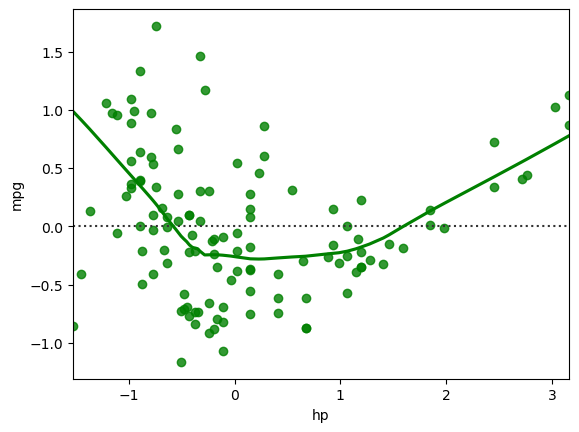

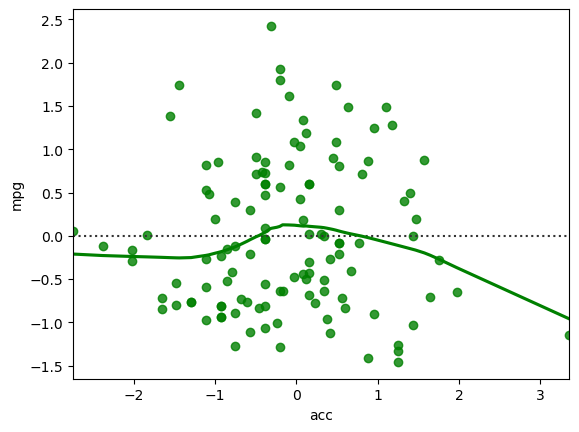

In [26]:
fig = plt.figure()
sns.residplot(x= X_test['hp'], y= y_test['mpg'], color='green', lowess=True )
plt.show()

fig = plt.figure()
sns.residplot(x= X_test['acc'], y= y_test['mpg'], color='green', lowess=True )
plt.show()

### 7.5 Visualization of Prediction vs Actual 

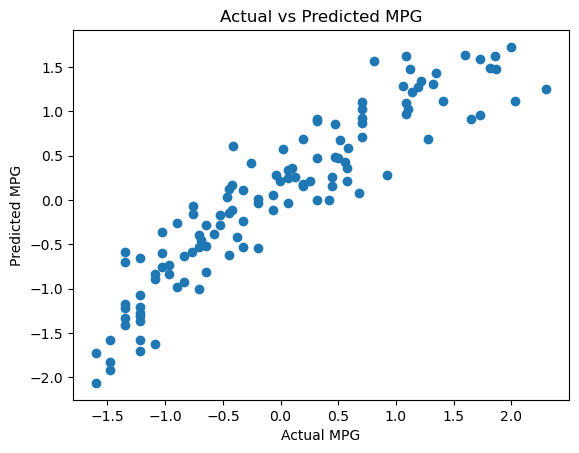

In [27]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['mpg'], y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.show()

## 8. Inference 

**Both Ridge & Lasso regularization performs very well on this data, though Ridge gives a better score. The above scatter plot depicts the correlation between the actual and predicted mpg values.**

---

## Summary — Day44: Regularization Techniques

In this notebook, I explored **regularization techniques** to overcome the limitations of Linear Regression models such as **overfitting** and **underfitting**.  
The key learnings and implementations are as follows:

- **Bias–Variance Tradeoff**
  - Understood how high variance → overfitting (low bias, memorization of data)  
  - High bias → underfitting (oversimplified model)  
  - Best models balance both bias & variance  

- **Dataset**
  - Used the **Car MPG dataset** with features such as horsepower, weight, and cylinders  
  - Target variable: **MPG (fuel efficiency)**  

- **Data Preprocessing**
  - Handled missing values  
  - Encoded categorical features (if present)  
  - Scaled numerical features before applying models  

- **Baseline: Linear Regression**
  - Trained a simple Linear Regression model  
  - Achieved good accuracy but showed signs of slight overfitting  

- **Ridge Regression (L2 Regularization)**
  - Shrinks large coefficients closer to zero (but not zero)  
  - Reduced variance and improved generalization  

- **Lasso Regression (L1 Regularization)**
  - Shrinks some coefficients all the way to **zero**  
  - Acted as a **feature selection method** by eliminating less important variables  

- **Elastic Net (L1 + L2 Regularization)**
  - Combined Ridge and Lasso advantages  
  - Balanced coefficient shrinkage and feature elimination  

- **Model Comparison**
  - Compared Linear, Ridge, Lasso, and Elastic Net  
  - Evaluated models using **R² Score (train & test)** and **MSE**  
  - Ridge slightly improved generalization  
  - Lasso performed feature elimination  
  - Elastic Net gave balanced results  

---

### Key Takeaways
- Regularization is essential to handle **overfitting** and **improve generalization**  
- **Ridge (L2)** → shrinks coefficients but keeps all features  
- **Lasso (L1)** → eliminates irrelevant features (feature selection)  
- **Elastic Net (L1+L2)** → combines both techniques  
- Most ML algorithms have regularization **built-in by default** (e.g., Logistic Regression, Neural Networks with weight decay)  

This day helped me understand **why regularization matters** and how it improves model stability and interpretability.
